<a href="https://colab.research.google.com/github/amelieloh21/WBS_Data-Science-and-Gen-AI/blob/main/Exploratory_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will be uploading a dataset containing various economic indicators across different countries. This dataset was taken from the global database CEIC.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Growth.xlsx to Growth.xlsx


In [ ]:
import os
os.listdir()

['.config', 'Growth.xlsx', 'filtered_growth.xlsx', 'sample_data']

Here we have a glimpse of the dataset.

In [ ]:
import pandas as pd
Growth = pd.read_excel('Growth.xlsx')
Growth.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333


I will now plot a scatterplot of the GDP Growth of each country versus its Trade Share. There does seem to be some relationship between the variables. As trade share increases, the growth rates increases. The scatterpoint for Malta lies at coordinate (1.99, 6.65). It looks like an outlier.

Text(0.5, 1.0, 'Growth vs. TradeShare')

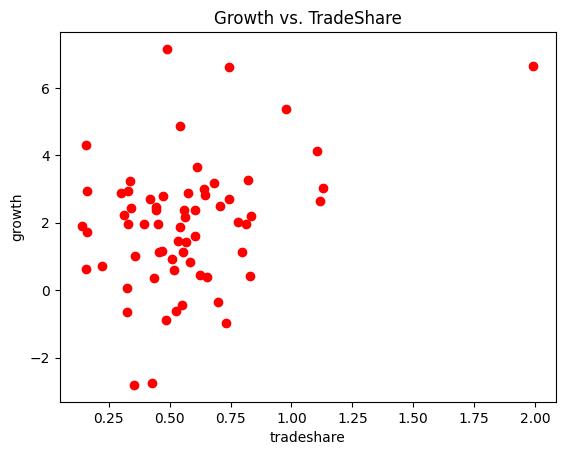

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Growth['tradeshare'], Growth['growth'], 'ro')
plt.xlabel('tradeshare')
plt.ylabel('growth')
plt.title('Growth vs. TradeShare')

We can run an OLS regression to measure the p value, the value of the coefficients and determine whether the relationships between the variables is statistically significant.

In [ ]:
import statsmodels.api as sm
x1 = Growth['tradeshare']
y1 = Growth['growth']
x1 = sm.add_constant(x1)
model1 = sm.OLS(y1,x1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     8.892
Date:                Thu, 19 Sep 2024   Prob (F-statistic):            0.00407
Time:                        13:16:59   Log-Likelihood:                -129.06
No. Observations:                  65   AIC:                             262.1
Df Residuals:                      63   BIC:                             266.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6403      0.490      1.307      0.1

In [ ]:
import statsmodels.api as sm

intercept = results1.params.iloc[0]  # Intercept (β0)
slope = results1.params.iloc[1]      # Slope (β1)

print(f"Intercept (β0): {intercept}")
print(f"Slope (β1): {slope}")

x_new_values = [0.5, 1]
x_new_with_const = sm.add_constant(x_new_values)
y_pred = results1.predict(x_new_with_const)

print("New X values:", x_new_values)
print("Predicted Y values using model:", y_pred)


Intercept (β0): 0.6402652743953499
Slope (β1): 2.306433739222276
New X values: [0.5, 1]
Predicted Y values using model: [1.79348214 2.94669901]


To determine whether we should exclude Malta's datapoint, we can create a new dataset without Malta and run an OLS regression again.

In [ ]:
# To exclude Malta's datapoint
Growth_filtered = Growth.drop(64)
Growth_filtered.to_excel('filtered_growth.xlsx', index=False)


In [ ]:
import pandas as pd
filtered_growth = pd.read_excel('filtered_growth.xlsx')
filtered_growth.head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333


From the results, we infer that when Malta is excluded from the dataset, the coefficient on tradeshare is smaller.

In [ ]:
import statsmodels.api as sm
x2 = filtered_growth['tradeshare']
y2 = filtered_growth['growth']
x2 = sm.add_constant(x2)
model2 = sm.OLS(y2,x2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.898
Date:                Thu, 19 Sep 2024   Prob (F-statistic):             0.0937
Time:                        13:17:11   Log-Likelihood:                -127.04
No. Observations:                  64   AIC:                             258.1
Df Residuals:                      62   BIC:                             262.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9574      0.580      1.650      0.1

In [ ]:
intercept = results2.params.iloc[0]  # Intercept (β0)
slope = results2.params.iloc[1]      # Slope (β1)

print(f"Intercept (β0): {intercept}")
print(f"Slope (β1): {slope}")

x_new_values = [0.5, 1]
x_new_with_const = sm.add_constant(x_new_values)
y_pred = results2.predict(x_new_with_const)

print("New X values:", x_new_values)
print("Predicted Y values using model:", y_pred)



Intercept (β0): 0.957410669203382
Slope (β1): 1.6809046630545303
New X values: [0.5, 1]
Predicted Y values using model: [1.797863   2.63831533]


I plotted regressions for when Malta was included in the dataset and when Malta was excluded from the dataset. When Malta is included in the regression, the best fit line is steeper because Malta's 'growth' value is higher than the rest of the data. As an outlier, the regression function adjusts to reduce the error, resulting in a steeper slope. Without Malta, the regression line fits the remaining data points more closely, leading to a gentler slope.

For context, Malta is a country in Southern Europe located in the Mediterranean Sea. Malta's trade share is large due to its favourable location in international trade routes and its role as a significant shipping hub. It should be excluded as it might distort the trend for other countries.

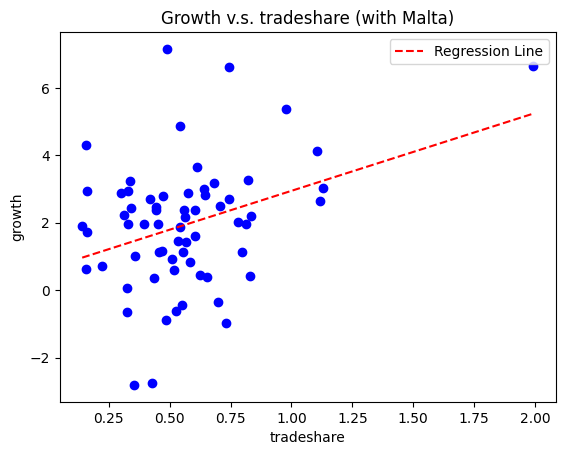

In [ ]:
# Plotting data points for Growth (inclusive of Malta)
plt.plot(Growth['tradeshare'],Growth['growth'],'bo')
plt.xlabel('tradeshare')
plt.ylabel('growth')
plt.title('Growth v.s. tradeshare (with Malta)')
plt.plot(Growth['tradeshare'],results1.fittedvalues,'r--',label='Regression Line')
plt.legend()
plt.show()

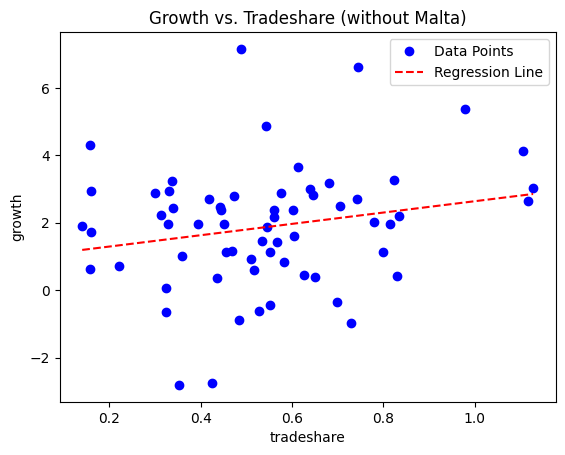

In [ ]:
# Plot data points for filtered_growth (exclusive of Malta)
plt.plot(filtered_growth['tradeshare'], filtered_growth['growth'], 'bo', label='Data Points')
plt.plot(filtered_growth['tradeshare'], results2.fittedvalues[filtered_growth.index], 'r--', label='Regression Line')
plt.xlabel('tradeshare')
plt.ylabel('growth')
plt.title('Growth vs. Tradeshare (without Malta)')
plt.legend()
plt.show()